## 💻 Day 5 - Product Category Insights & Trends

### 📥 Step 1: Load the cleaned dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/superstore_cleaned.csv')
df.head()

,row_id,order_id,order_date,order_priority,order_quantity,sales,discount,ship_mode,profit,unit_price,...,customer_name,province,region,customer_segment,product_category,product_sub-category,product_name,product_container,product_base_margin,ship_date
0,1,3,10/13/2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
1,49,293,10/1/2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2,50,293,10/1/2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
3,80,483,7/10/2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
4,85,515,8/28/2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


### 📦 Step 2: Aggregate by Category and Sub-Category

In [3]:
category_summary = df.groupby(['product_category', 'product_sub-category'])[['sales', 'profit']].sum().reset_index()
category_summary.sort_values(by='sales', ascending=False, inplace=True)
category_summary.head()

,product_category,product_sub-category,sales,profit
15,Technology,Office Machines,2168697.140,307712.93
3,Furniture,Tables,1896008.142,-99062.50
16,Technology,Telephones and Communication,1889313.802,316951.62
1,Furniture,Chairs & Chairmats,1761836.550,149649.73
14,Technology,Copiers and Fax,1130361.300,167361.49


### 📈 Step 3: Barplot - Total Sales by Category

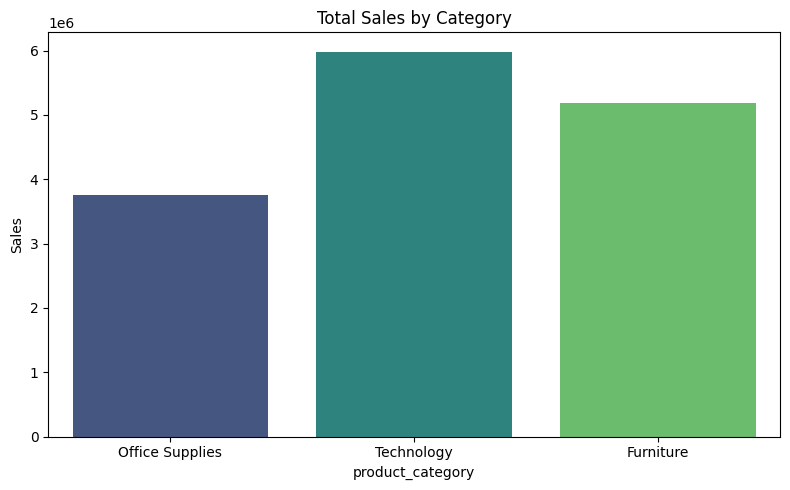

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='product_category', y='sales', hue='product_category', estimator=sum, errorbar=None, palette='viridis')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

### 💰 Step 4: Barplot - Total Profit by Sub-Category

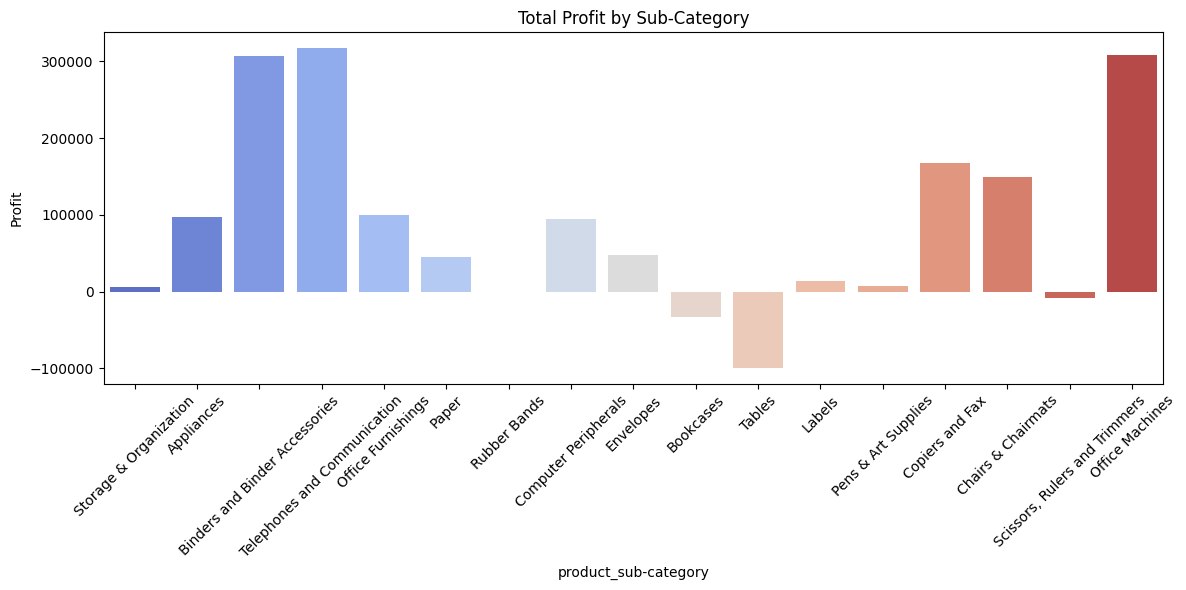

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='product_sub-category', y='profit', hue='product_sub-category', estimator=sum, errorbar=None, palette='coolwarm')
plt.title('Total Profit by Sub-Category')
plt.xticks(rotation=45)
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

### ⚖️ Step 5: Profit Margin by Sub-Category

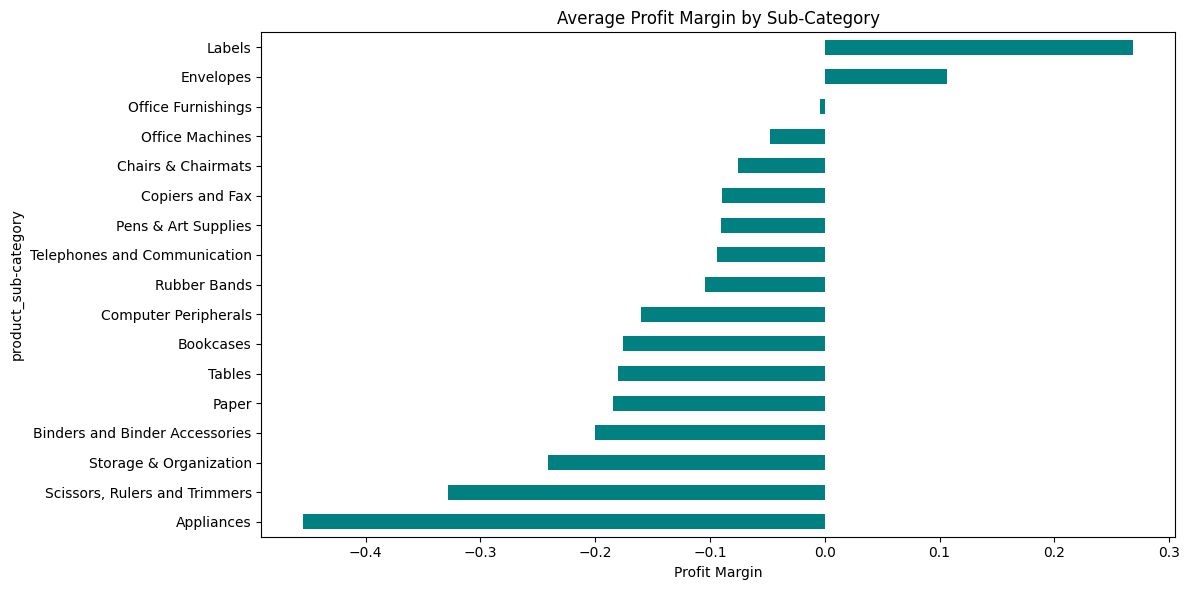

In [10]:
df['profit_margin'] = df['profit'] / df['sales']
subcat_margin = df.groupby('product_sub-category')['profit_margin'].mean().sort_values()

plt.figure(figsize=(12, 6))
subcat_margin.plot(kind='barh', color='teal')
plt.title('Average Profit Margin by Sub-Category')
plt.xlabel('Profit Margin')
plt.tight_layout()
plt.show()

## ✅ Summary of Day 5
- Grouped sales data by product_category and product_sub-category
- Analyzed total profit across each product group
- Visualized top 10 and bottom 10 products by profitability using bar charts
- Identified key products contributing most to losses and gains

🚀 Ready to move to Day 6: Time Series Trends and Sales Seasonality!